In [1]:
#Import needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
#Load files into dataframes
mouse_metadata = pd.read_csv("data/mouse_metadata.csv")
study_results = pd.read_csv("data/Study_results.csv")

In [3]:
#Next to merge the data into one dataframe 
study_metadata = pd.merge(mouse_metadata,study_results,on='Mouse ID')
#This is a dataframe i'm going to use several times later in the homework
individual_mice = study_metadata.drop_duplicates(subset=['Mouse ID'])


In [4]:
#First up we are asked to print out a summary table of common statistics. This is easily done using .agg and groupby
stat_sum = study_metadata.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
stat_sum

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


(0, 30)

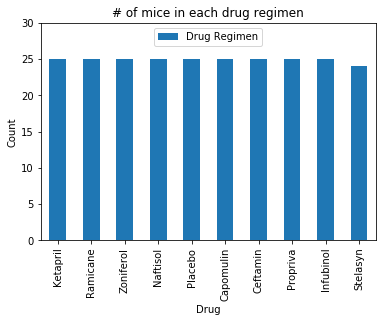

In [5]:
#Now to make a bar chart showing the relative number of datapoints for each regimen using pandas
individual_mice['Drug Regimen'].value_counts().plot(kind='bar')
plt.title('# of mice in each drug regimen')
plt.legend(['Drug Regimen'], loc="upper center")
plt.ylabel("Count")
plt.xlabel("Drug")
plt.ylim(0,30)

(0, 30)

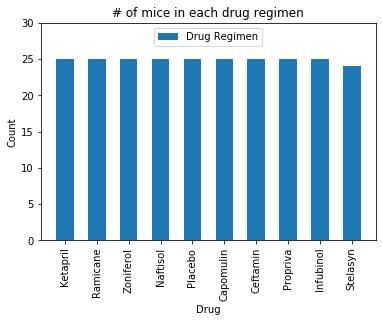

In [6]:
#We are asked to do the same but this time using pyplot. For this we need to manually create the x and y variables i guess
dr_y_axis = individual_mice['Drug Regimen'].value_counts()
dr_x_axis = dr_y_axis.index
plt.bar(dr_x_axis,dr_y_axis,width=0.55)
plt.xticks(rotation=90)
plt.title('# of mice in each drug regimen')
plt.legend(['Drug Regimen'], loc="upper center")
plt.ylabel("Count")
plt.xlabel("Drug")
plt.ylim(0,30)

Text(0.5, 1, 'Male vs Female')

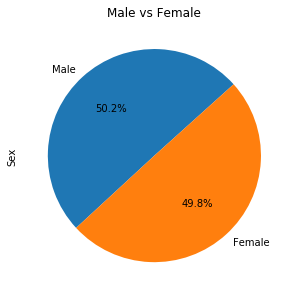

In [7]:
#Now we want to do the same general thing but with a pie chart and the split between male and female mice
individual_mice['Sex'].value_counts().plot(kind='pie',startangle=42,autopct="%1.1f%%")
plt.tight_layout()
plt.title('Male vs Female')

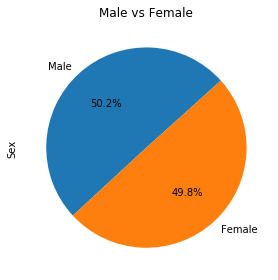

In [8]:
sx_size = individual_mice['Sex'].value_counts()
sx_labels = sx_size.index
plt.pie(sx_size, labels=sx_labels,startangle=42,autopct="%1.1f%%")
plt.title('Male vs Female')
plt.ylabel("Sex")
plt.tight_layout()

In [9]:
#Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin.
#First thing that needs to done is to get the final volume which should just be the volume when the timepoint is max
#This is a little trickier but rally all i need to do is groupup each mouse and find the max timepoint as the filter, then pass
#that into a new dataframe
final_vol_filter = study_metadata.groupby('Mouse ID')['Timepoint'].transform(max) == study_metadata['Timepoint']
final_vol_df = study_metadata[final_vol_filter]

#Here i ma going to write a function that i can pass a drug name into and it will spit out te stats i want
def quar_stats(drug_name):
    #First to set up the filter
    drug_filter = final_vol_df['Drug Regimen'] == drug_name
    drug_df = final_vol_df[drug_filter]
    
    #Now we want to find to IQR so that we can identify outliers. 
    quartiles = drug_df['Tumor Volume (mm3)'].quantile([0.25,0.5,0.75])
    iqr = quartiles[0.75]-quartiles[.25]
    lower_limit = round(quartiles[.25] - (1.5*iqr),2)
    upper_limit = round(quartiles[.75] + (1.5*iqr),2)
    
    #now to print out the statistics
    print(f'The IQR for final tumor volume of mice on drug {drug_name} is {round(iqr,2)}. Any outliers will be lower than {lower_limit} or higher than {upper_limit}')

    #One last thing I can try to do is find outliers
    drug_ol_df = drug_df[(drug_df['Tumor Volume (mm3)'] <= lower_limit) | (drug_df['Tumor Volume (mm3)'] >= upper_limit)]
    print(f'This drug has {len(drug_ol_df)} outlier(s)')

#Now to run the function for the 4 drugs in question
quar_stats('Capomulin')
quar_stats('Ramicane')
quar_stats('Infubinol')
quar_stats('Ceftamin')

The IQR for final tumor volume of mice on drug Capomulin is 7.78. Any outliers will be lower than 20.7 or higher than 51.83
This drug has 0 outlier(s)
The IQR for final tumor volume of mice on drug Ramicane is 9.1. Any outliers will be lower than 17.91 or higher than 54.31
This drug has 0 outlier(s)
The IQR for final tumor volume of mice on drug Infubinol is 11.48. Any outliers will be lower than 36.83 or higher than 82.74
This drug has 1 outlier(s)
The IQR for final tumor volume of mice on drug Ceftamin is 15.58. Any outliers will be lower than 25.36 or higher than 87.67
This drug has 0 outlier(s)


([<matplotlib.axis.XTick at 0x1e72cfaa3c8>,
 <a list of 4 Text xticklabel objects>)

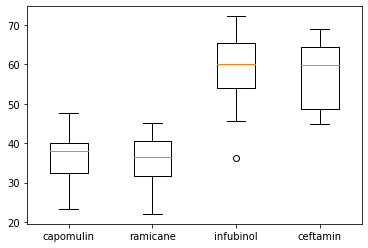

In [10]:
#Using the dataframe we created we are asked to make a box and whiskers plot
#first to set up the filters
drug_1 = final_vol_df['Drug Regimen'] == 'Capomulin'
drug_2 = final_vol_df['Drug Regimen'] == 'Ramicane'
drug_3 = final_vol_df['Drug Regimen'] == 'Infubinol'
drug_4 = final_vol_df['Drug Regimen'] == 'Ceftamin'

#Next to make the dataframes
capomulin_df = final_vol_df[drug_1]
ramicane_df = final_vol_df[drug_2]
infubinol_df = final_vol_df[drug_3]
ceftamin_df = final_vol_df[drug_4]

#Then we can just pass those dataframes and the correct column into a boxplot
plt.boxplot((capomulin_df['Tumor Volume (mm3)'],ramicane_df['Tumor Volume (mm3)'],
             infubinol_df['Tumor Volume (mm3)'],ceftamin_df['Tumor Volume (mm3)']))
plt.xticks([1,2,3,4],['capomulin','ramicane','infubinol','ceftamin'])

Text(0.5, 1.0, 'Mouse m957 trendline')

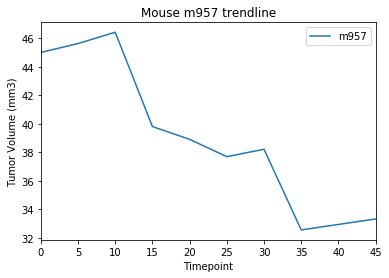

In [11]:
#Generate a line plot of time point versus tumor volume for a single mouse treated with Capomulin.
#using a rng I picked m957 as my mouse to track and need to filter a dataframe with just her data
m957_filter = study_metadata['Mouse ID'] == "m957"
m957_df = study_metadata[m957_filter]

#Now to plot this data
m957_df.plot('Timepoint','Tumor Volume (mm3)')
plt.ylabel('Tumor Volume (mm3)')
plt.legend(['m957'])
plt.title("Mouse m957 trendline")


The linear regression model for weight vs volume is 0.95x + 21.55
and the correlation coefficient is 0.84


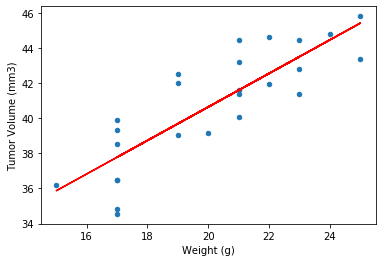

In [12]:
#for this next part we are to create a scatter plot of the weight vs tumor volume for mice on the capomulin drug
#First we need to filter the original dataframe for only the requested drug. this is different from our previous filter
capomulin_df_total = study_metadata[study_metadata['Drug Regimen'] == 'Capomulin']
capomulin_df = capomulin_df_total.groupby(['Mouse ID']).mean()

#Next we want to find the linear regression model and correlation coefficient for these datapoints which is easy with scipy
#We ask for some additional information, uts just how this particular function works
slope, intercept, r_value, p_value, std_err = st.linregress(capomulin_df['Weight (g)'],capomulin_df['Tumor Volume (mm3)'])
print(f'The linear regression model for weight vs volume is {round(slope,2)}x + {round(intercept,2)}')
print(f'and the correlation coefficient is {round(r_value,2)}')

capomulin_df.plot.scatter('Weight (g)','Tumor Volume (mm3)')
plt.plot(capomulin_df['Weight (g)'],slope*capomulin_df['Weight (g)'] + intercept,color="red")

In [13]:
#Write up
#Starting with the initial box plox, it's not a lot to go off from by itself. Since it is the final measurement It appears to 
    #show that Capomulin and Ramicane are better drugs than Infubinol and Ceftamin. However, this doesn't tell the whole story
    #It would be nice to have the initial state, or percent change even. Having said that perhaps random distribution of mice
    # to any particular drug might show this is a somewhat accurate statement.
#When we are asked to plot a trend for a single mouse, this is good coding practice but tells us absolutely nothing data wise
    #Yes, that individual mouse has a downward trend, but the database doesn't even begin to cover other factors that might 
    #affect the tumor size such as diet, exercise, genes (assuming these mice aren't nearly identical). Having a sample
    #can begin to tell a picture but a single mouse... if i saw this in a report i'd assume tey were cherry picking. 
#The last scatter plot is another example for good practice, not real application. For starters I'm assuming the  weight is of the mouse
    #I can invision a non derivative way of caculating the weight of the tumor. So this is telling us bigger mice have bigger tumors?
    #although more complicated it would have been cool to do a scatter plot of volume size vs time measurement, and a color scale
    #for the drug regimin used. 